# Universidad de los Andes - Facultad de Economía
### Habilidades Intermedias para Analistas de Datos
### Módulo 3 - Modelos lineales aplicados a negocios en Python

# Análisis Multivariado
<b>Objetivos:</b>
<ul>
<li>Ver la importancia de ordenar la información en estructuras que permitan comparar variables.</li>
<li>Repasar cuáles son algunos gráficos que nos permiten graficar múltiples variables en un solo cuadro</li>
<li>Entender la importancia de la Varianza y la Covarianza y cómo la podemos calcular y graficar</li>
</ul>


In [ ]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Contexto y objetivo de análisis
Disponemos de datos de rentas de apartamentos o casas en la India, donde tenemos datos de características de los inmuebles y el costo.

<b>Objetivo del análisis: explorar la relación entre las características de una vivienda afectan el valor de su renta.

## Tablas de Contingencias
Las tablas de contigencias o `crosstab()` en python tienen la misma función que una tabla dinámica en Excel con variables en las columnas.<br>
Son bastante útiles cuando queremos comparar los medidas estadísticas (media, moda, frecuencias, etc) entre diferentes grupos o categorías de un conjunto de datos.
### Crosstab
Primero importemos el conjunto de datos.<br>


In [ ]:
df_house = pd.read_csv( r"House_Rent_Dataset.csv")
print(df_house.shape)
df_house.head()

(4746, 12)


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Vamos a usar las fechas más adelante, entonces aprovechemos para dejarlas en el formato correcto.

In [ ]:
df_house["Posted On"] = pd.to_datetime(df_house["Posted On"])

In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4746 non-null   datetime64[ns]
 1   BHK                4746 non-null   int64         
 2   Rent               4746 non-null   int64         
 3   Size               4746 non-null   int64         
 4   Floor              4746 non-null   object        
 5   Area Type          4746 non-null   object        
 6   Area Locality      4746 non-null   object        
 7   City               4746 non-null   object        
 8   Furnishing Status  4746 non-null   object        
 9   Tenant Preferred   4746 non-null   object        
 10  Bathroom           4746 non-null   int64         
 11  Point of Contact   4746 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 445.1+ KB


Para la función `crosstab()` en Python, al igual que en Excel, usamos variables cualitativas o de las variables categóricas, usando `.describe(include = "O")` en las filas o columnas.

También es posible usar variables cuantitativas en las filas o columnas, pero se generaríam muchos grupos pequeños, cuya interpretación no es útil, dificultaría visualizar y afectaría el sentido de la agrupación.<br>


In [ ]:
df_house.describe(include="O")

,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
count,4746,4746,4746,4746,4746,4746,4746
unique,480,3,2235,6,3,3,3
top,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,Contact Owner
freq,379,2446,37,972,2251,3444,3216


Primero veamos cómo sería un ejercicio agrupando 2 variables en un `groupby()` y comparemos esto con `crosstab()`.

In [ ]:
df_house[["City", "Furnishing Status", "Posted On"]].groupby(["City", "Furnishing Status"]).count()

Posted On
City      Furnishing Status           
Bangalore Furnished                 91
          Semi-Furnished           584
          Unfurnished              211
Chennai   Furnished                 81
          Semi-Furnished           448
          Unfurnished              362
Delhi     Furnished                 97
          Semi-Furnished           278
          Unfurnished              230
Hyderabad Furnished                111
          Semi-Furnished           402
          Unfurnished              355
Kolkata   Furnished                 61
          Semi-Furnished           142
          Unfurnished              321
Mumbai    Furnished                239
          Semi-Furnished           397
          Unfurnished              336

In [ ]:
pd.crosstab(df_house["City"], df_house["Furnishing Status"])

Furnishing Status,Furnished,Semi-Furnished,Unfurnished
City,,,
Bangalore,91,584,211
Chennai,81,448,362
Delhi,97,278,230
Hyderabad,111,402,355
Kolkata,61,142,321
Mumbai,239,397,336


La función `crosstab()` tiene otros argumentos que nos pueden ayudar a crear tablas más ordenadas o con más información.

In [ ]:
pd.crosstab(df_house["City"], df_house["Furnishing Status"], margins=True)#Agrega una columna y una fila con los Valores Totales

Furnishing Status,Furnished,Semi-Furnished,Unfurnished,All
City,,,,
Bangalore,91,584,211,886
Chennai,81,448,362,891
Delhi,97,278,230,605
Hyderabad,111,402,355,868
Kolkata,61,142,321,524
Mumbai,239,397,336,972
All,680,2251,1815,4746


In [ ]:
pd.crosstab(df_house["City"], [df_house["Furnishing Status"],df_house["Tenant Preferred"]], margins=True)#Totales#2 variables en el eje x, se puede hacer lo mismo con el y

Furnishing Status Furnished                         Semi-Furnished  \
Tenant Preferred  Bachelors Bachelors/Family Family      Bachelors   
City                                                                 
Bangalore                11               73      7             70   
Chennai                   8               67      6             58   
Delhi                    20               77      0             81   
Hyderabad                12               84     15             36   
Kolkata                  11               49      1             20   
Mumbai                   35              158     46             59   
All                      97              508     75            324   

Furnishing Status                         Unfurnished                          \
Tenant Preferred  Bachelors/Family Family   Bachelors Bachelors/Family Family   
City                                                                            
Bangalore                      470     44          54              151      6   
Chennai                        320     70          71              262     29   
Delhi                          191      6          61              164      5   
Hyderabad                      311     55          54              281     20   
Kolkata                        115      7          91              215     15   
Mumbai                         268     70          78              188     70   
All                           1675    252         409             1261    145   

Furnishing Status   All  
Tenant Preferred         
City                     
Bangalore           886  
Chennai             891  
Delhi               605  
Hyderabad           868  
Kolkata             524  
Mumbai              972  
All                4746

In [ ]:
pd.crosstab(df_house["City"], df_house["Furnishing Status"], normalize="index")#normaliza respecto a un elemento | index para filas | columns para columnas | True o all para el total | mostrar en la documentación

Furnishing Status,Furnished,Semi-Furnished,Unfurnished
City,,,
Bangalore,0.10,0.66,0.24
Chennai,0.09,0.50,0.41
Delhi,0.16,0.46,0.38
Hyderabad,0.13,0.46,0.41
Kolkata,0.12,0.27,0.61
Mumbai,0.25,0.41,0.35


In [ ]:
0.102709 + 0.659142 + 0.238149

1.0

También se puede crear la tabla usando funciones sobre valores, no solo con las frecuencias.

In [ ]:
pd.crosstab(df_house["City"], df_house["Furnishing Status"], values=df_house["Rent"], aggfunc=np.average)

Furnishing Status,Furnished,Semi-Furnished,Unfurnished
City,,,
Bangalore,"32,531.87","26,879.45","16,408.53"
Chennai,"32,961.67","23,900.58","16,245.30"
Delhi,"30,214.44","33,945.32","23,725.65"
Hyderabad,"24,353.15","25,002.44","14,331.27"
Kolkata,"13,865.57","11,722.54","11,189.01"
Mumbai,"108,974.53","99,744.59","51,454.46"


In [ ]:
pd.crosstab(df_house["City"], df_house["Furnishing Status"], values=df_house["Rent"], aggfunc="mean")

Furnishing Status,Furnished,Semi-Furnished,Unfurnished
City,,,
Bangalore,"32,531.87","26,879.45","16,408.53"
Chennai,"32,961.67","23,900.58","16,245.30"
Delhi,"30,214.44","33,945.32","23,725.65"
Hyderabad,"24,353.15","25,002.44","14,331.27"
Kolkata,"13,865.57","11,722.54","11,189.01"
Mumbai,"108,974.53","99,744.59","51,454.46"


In [ ]:
pd.crosstab(df_house["City"], df_house["Furnishing Status"], values=df_house["Rent"], aggfunc="min", rownames= ["Ciudad"], colnames=["Estado"])

Estado,Furnished,Semi-Furnished,Unfurnished
Ciudad,,,
Bangalore,5000,4000,3500
Chennai,6500,3500,3000
Delhi,5000,5000,2000
Hyderabad,1200,3000,3300
Kolkata,2200,1500,2200
Mumbai,11000,6000,4500


In [ ]:
pd.crosstab([df_house["City"], df_house["Posted On"].dt.quarter], df_house["Furnishing Status"], values=df_house["Rent"], aggfunc="min") #Acá estamos usando una función sobre los valores de fecha para organizar los registros en trimestres.

Furnishing Status    Furnished  Semi-Furnished  Unfurnished
City      Posted On                                        
Bangalore 2               5000            4000         3500
          3              12000            4500         5000
Chennai   2               6500            3500         3000
          3               8000            5700         3500
Delhi     2               5000            5000         2000
          3               9500            5000         5500
Hyderabad 2               1200            3000         3300
          3               8000            3000         5000
Kolkata   2               2200            1500         2200
          3               4700            6500         4000
Mumbai    2              11000            6000         4500
          3              28000            7500         6000

Como se ha mostrado en clases anteriores, los gráficos también son una forma útil de observar el comportamiento de los datos y ver si observamos agrupaciones (clusters) que nos permitan empezar a formular hipótesis.
### Gráficos

Empecemos con un gráfico de burbujas, este se realiza con el mismo código del gráfico de dispersión, donde hacemos uso de las características de las marcas para graficar otro tipo de variables.
<ul>
<li>Eje X: Continua</li>
<li>Eje Y: Continua</li>
<li>Tamaño de los marcadores: Puede ser continua o categórica</li>
<li>Color de los marcadores: Puede ser continua o categórica</li>
</ul>

<Axes: xlabel='Posted On', ylabel='Rent'>

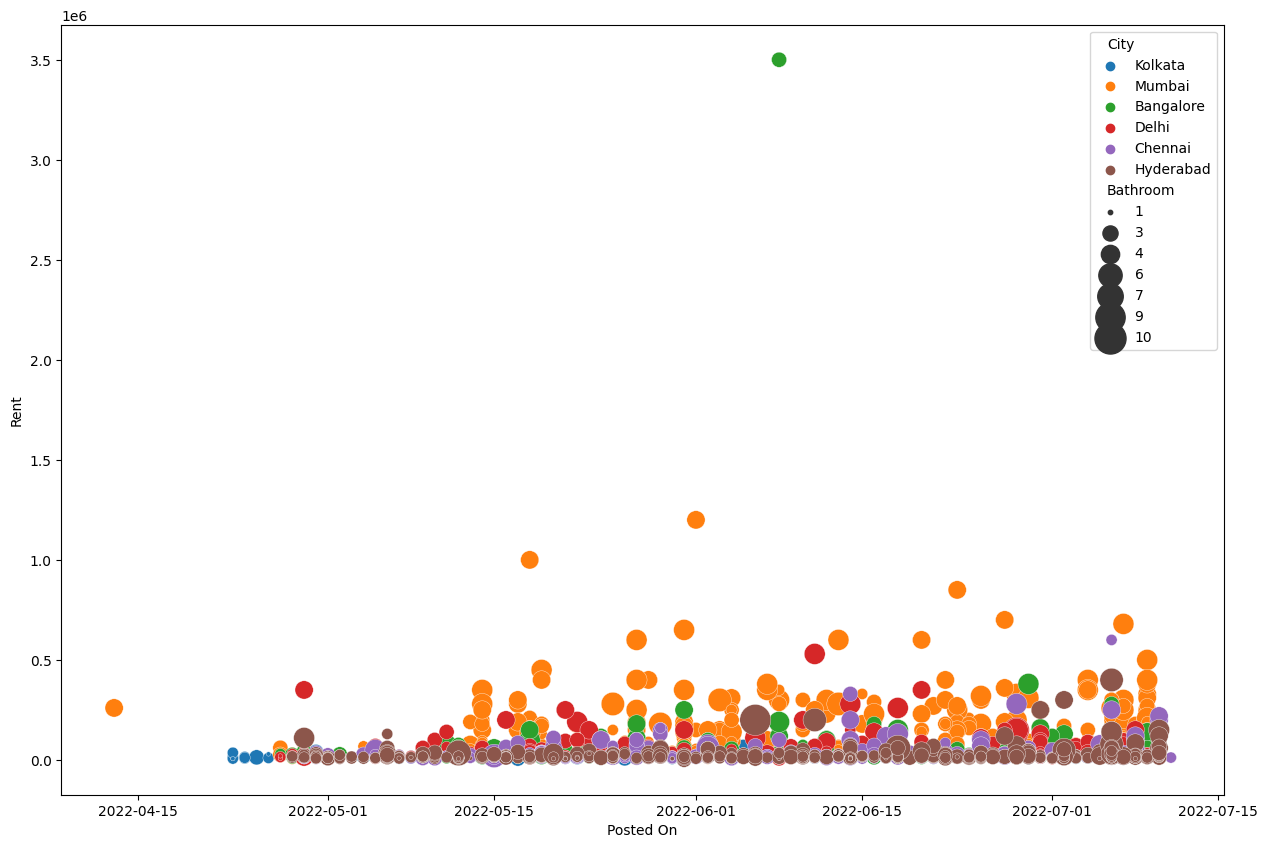

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_house, x="Posted On", y="Rent", hue="City", size="Bathroom", legend=True, sizes=(10, 500))

El diagrama de caja y bigotes también nos puede agrupar por una variable categórica los gráficos realizados.

<b>Pregunta:</b> ¿Qué información adicional brindaría el diagrama de violín frente al de caja y bigotes?

<Axes: xlabel='Area Type', ylabel='Rent'>

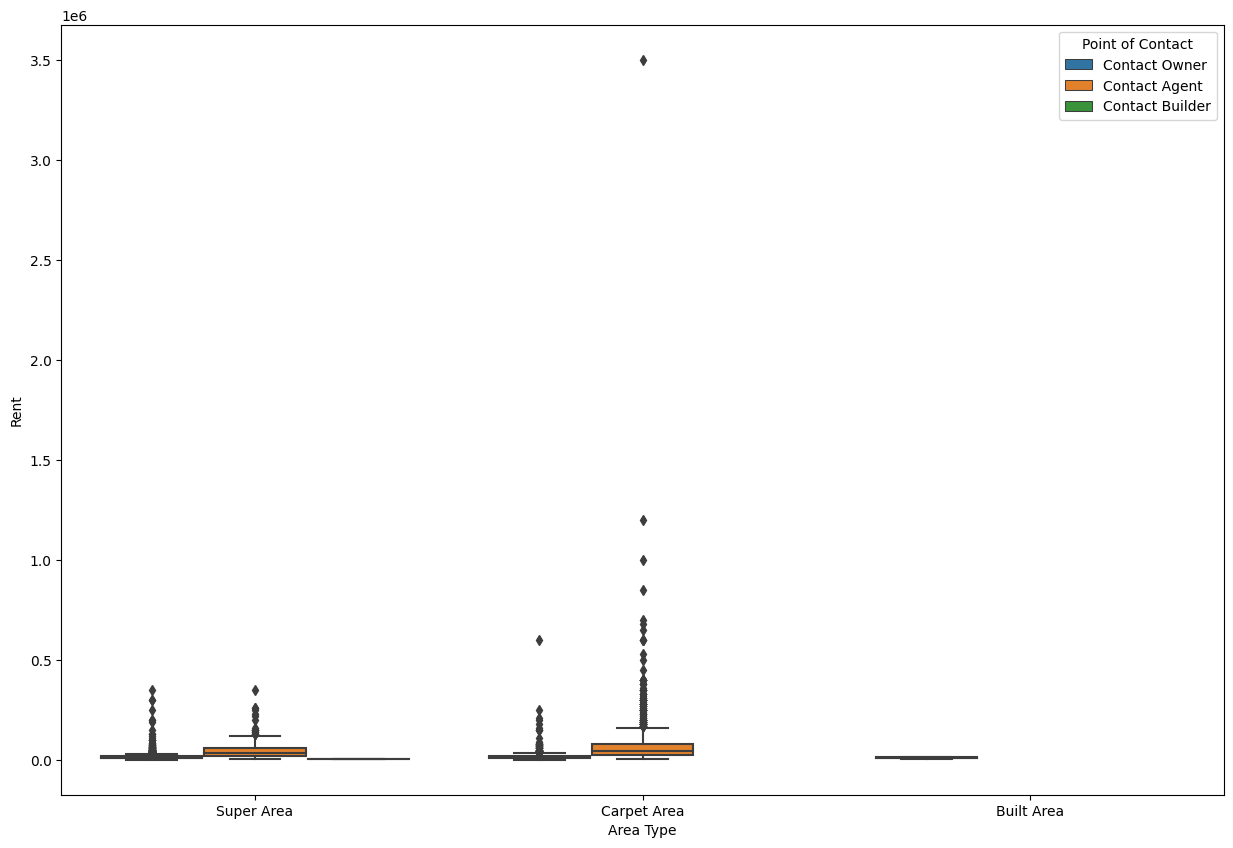

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_house, x="Area Type", y="Rent", hue="Point of Contact")

De forma similar, en un diagrama de barras también se pueden agrupar las columnas por otras variables categóricas.

<Axes: xlabel='Bathroom', ylabel='Rent'>

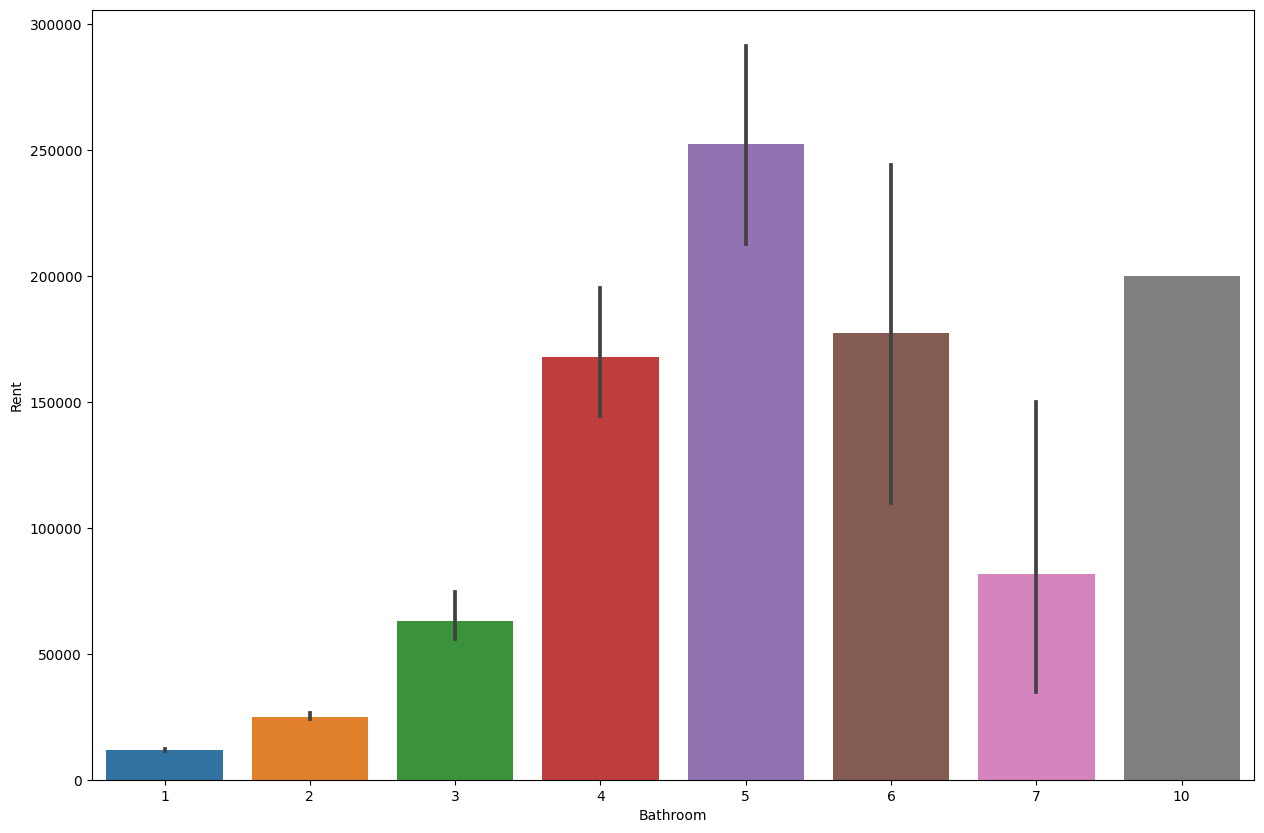

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_house, x = "Bathroom", y = "Rent")

<Axes: xlabel='Bathroom', ylabel='Rent'>

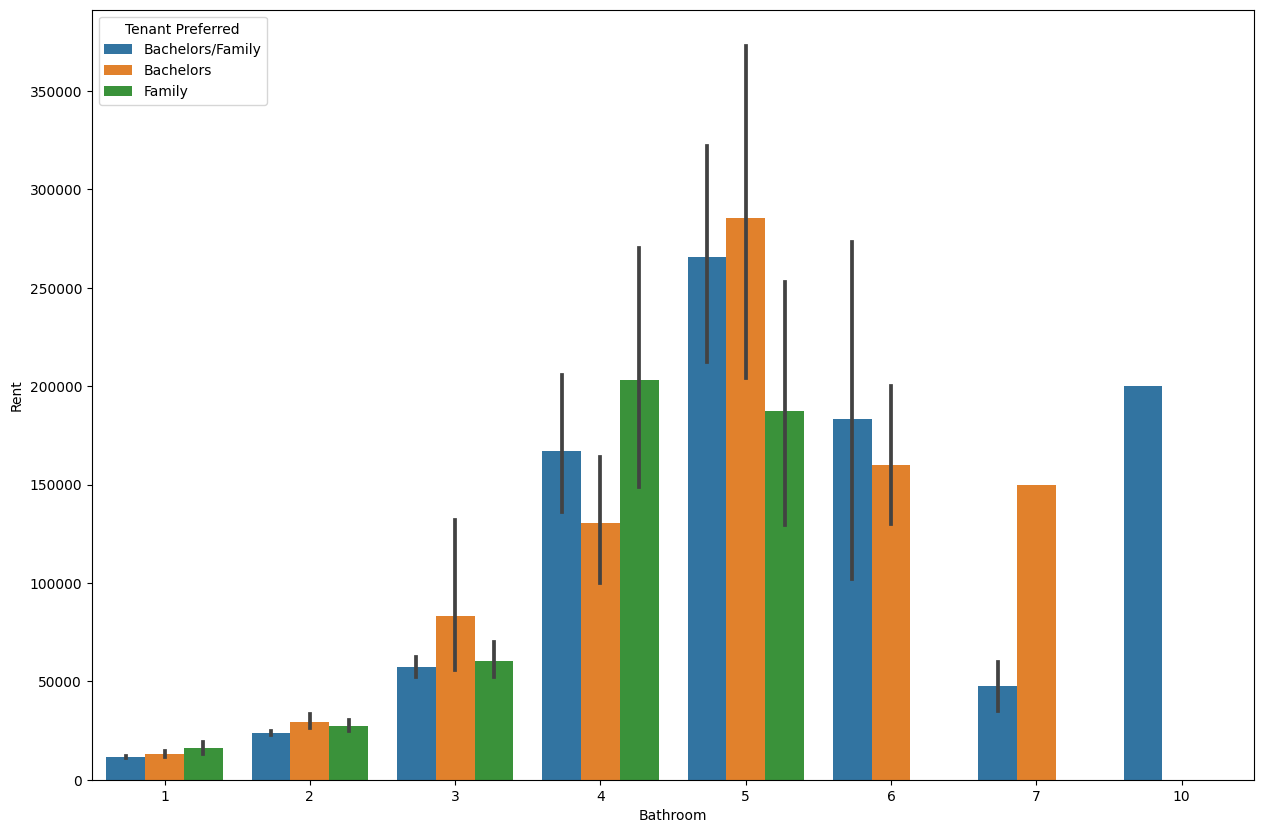

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_house, x = "Bathroom", y = "Rent", hue="Tenant Preferred")

### Matriz de varianza covarianza

La covarianza es una medida de cómo los cambios en una variable se asocian con los cambios en una segunda variable. Específicamente, es una medida del grado en que dos variables están asociadas linealmente.<br>
La varianza es la distancia promedio de los valores respecto a su media.<br>
En una matriz de varianza-covarianza tenemos en la diagonal la <b>varianza</b> de una variable respecto a sí misma, mientras que los otros valores son la <b>covarianza</b> entre dos variables.

In [ ]:
df_house.cov()

<ipython-input-20-d01d9cbdd823>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_house.cov()


,BHK,Rent,Size,Bathroom
BHK,0.69,"24,033.31",377.99,0.59
Rent,"24,033.31","6,100,611,741.94","20,485,348.00","30,482.50"
Size,377.99,"20,485,348.00","402,212.59",415.51
Bathroom,0.59,"30,482.50",415.51,0.78


<ipython-input-33-e4e455327c5a>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df_house.cov(), annot=True, fmt=".2f", vmax=20000000, vmin=-1)


<Axes: >

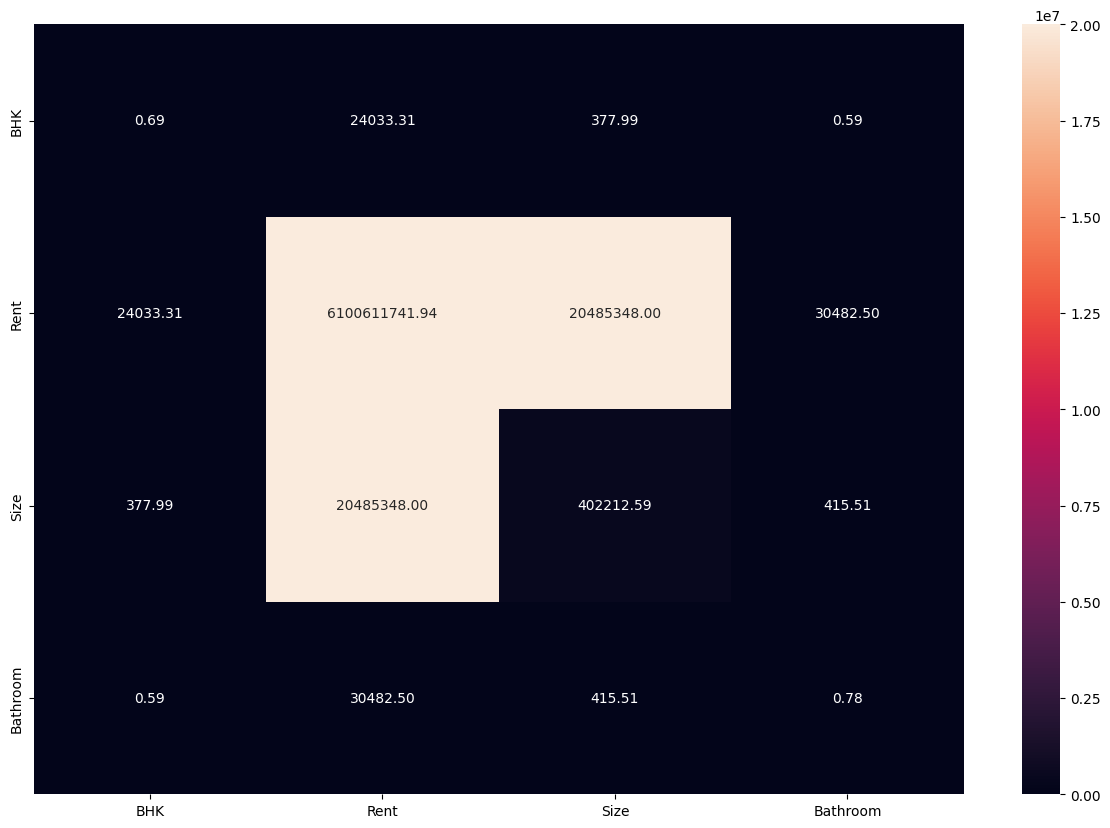

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data = df_house.cov(), annot=True, fmt=".2f", vmax=20000000, vmin=-1)

<ipython-input-22-814a31e2fd78>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df_house.corr(), annot=True, fmt=".2f", vmax=1, vmin=-1)


<Axes: >

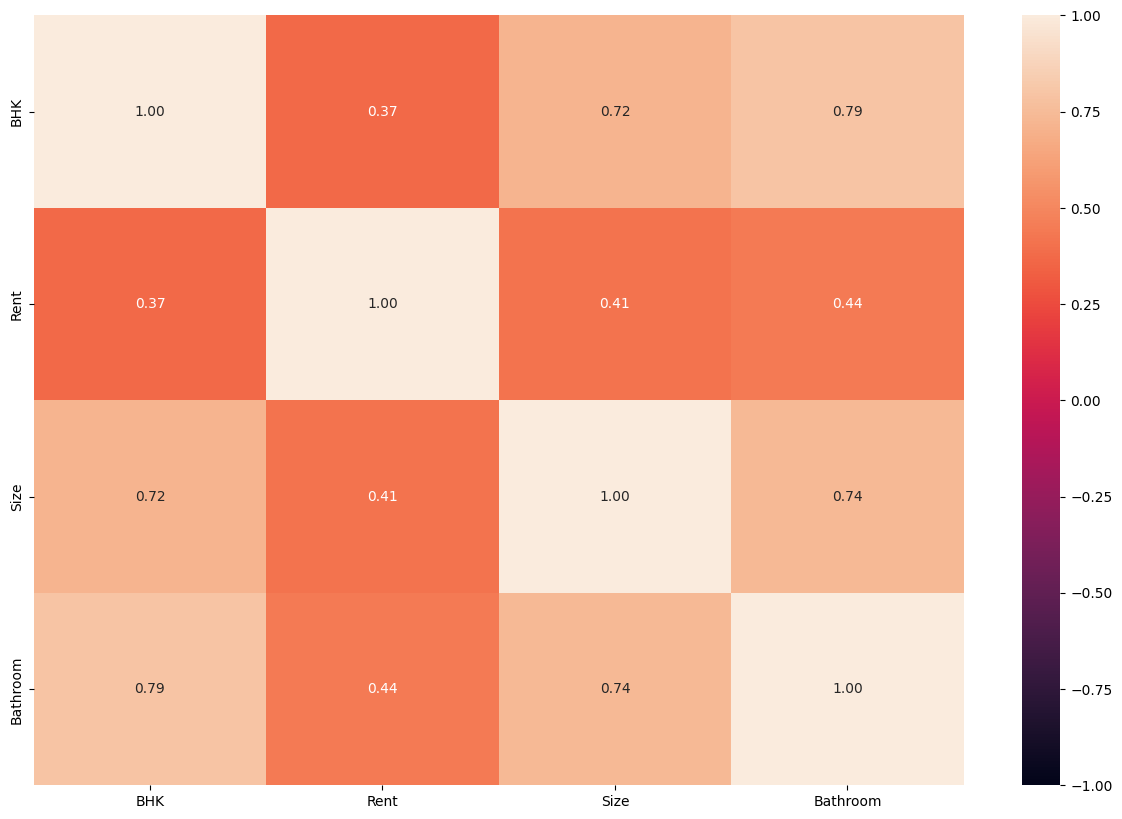

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data = df_house.corr(), annot=True, fmt=".2f", vmax=1, vmin=-1)

En nuestra tabla de varianza-covarianza, no vemos un comportamiento útil, esto es debido a que la varianza de la variable <b>Renta</b> es demasiado alta.<br>

<b>Ejercicio:</b> intente solucionar este problema.<br>

<i>Tip 1:</i> Realice un análisis univariado del campo renta.

<i>Tip 2:</i> Realice un análisis bivariado del campo renta con campos con los que se pueda argumentar alguna relación interesante, por ejemplo, el campo con el que mas se correlaciona.

<i>Tip 3:</i> Realice un análisis multivariado sin incluir el campo renta.



**Ahora, con otra base de datos y variables que se encuentran en la misma unidad evaluaremos ¿Como se ve la matriz de covarianza?**

In [ ]:
calificaciones = pd.read_csv(r'Original_data_with_more_rows.csv')

<Axes: >

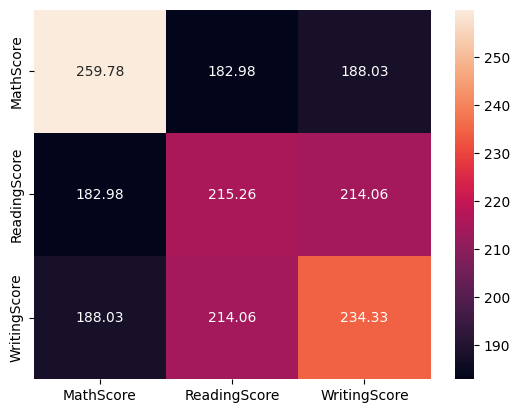

In [ ]:
sns.heatmap(data = calificaciones[['MathScore',	'ReadingScore',	'WritingScore']].cov(), annot=True, fmt=".2f")

**¿Existen variables que tengan una relación lineal positiva o relación lineal negativa?**

Usted puede utilizar la covarianza para determinar la dirección de una relación lineal entre dos variables, de la siguiente manera:
Si ambas variables tienden a aumentar o disminuir a la vez, el coeficiente es positivo.
Si una variable tiende a incrementarse mientras la otra disminuye, el coeficiente es negativo.
La covarianza es similar a la correlación, pero cuando se calcula la covarianza, los datos no están estandarizados. Por lo tanto, la covarianza se expresa en unidades que varían con los datos y no se convierte a una escala estandarizada de −1 a +1. Puesto que los datos no están estandarizados, usted no puede utilizar el estadístico de covarianza para evaluar la fuerza de una relación lineal. Si lo que requiere, es evaluar la fuerza de la relación, utilizaremos la correlación.

### Paradoja de Simpson
En clases anteriores hemos hablado de las conclusiones que se pueden sacar de los datos por medio del análisis de la información. No obstante, al analizar los datos es importante que tengamos en cuenta que los datos también pueden engañar.<br>
Ahora vemos 4 gráficos creados de la misma base de datos, pero posiblemente la conclusión que sacamos de una va a diferir de la conslusión que sacamos de otra gráfica.<br>
No podemos decir que la renta a familias es más costosa o que los apartamentos de familias tienen más baños.<br>
<b>Vamos a ver lo que es la paradoja de Simpson.</b>

<Axes: xlabel='Tenant Preferred', ylabel='Bathroom'>

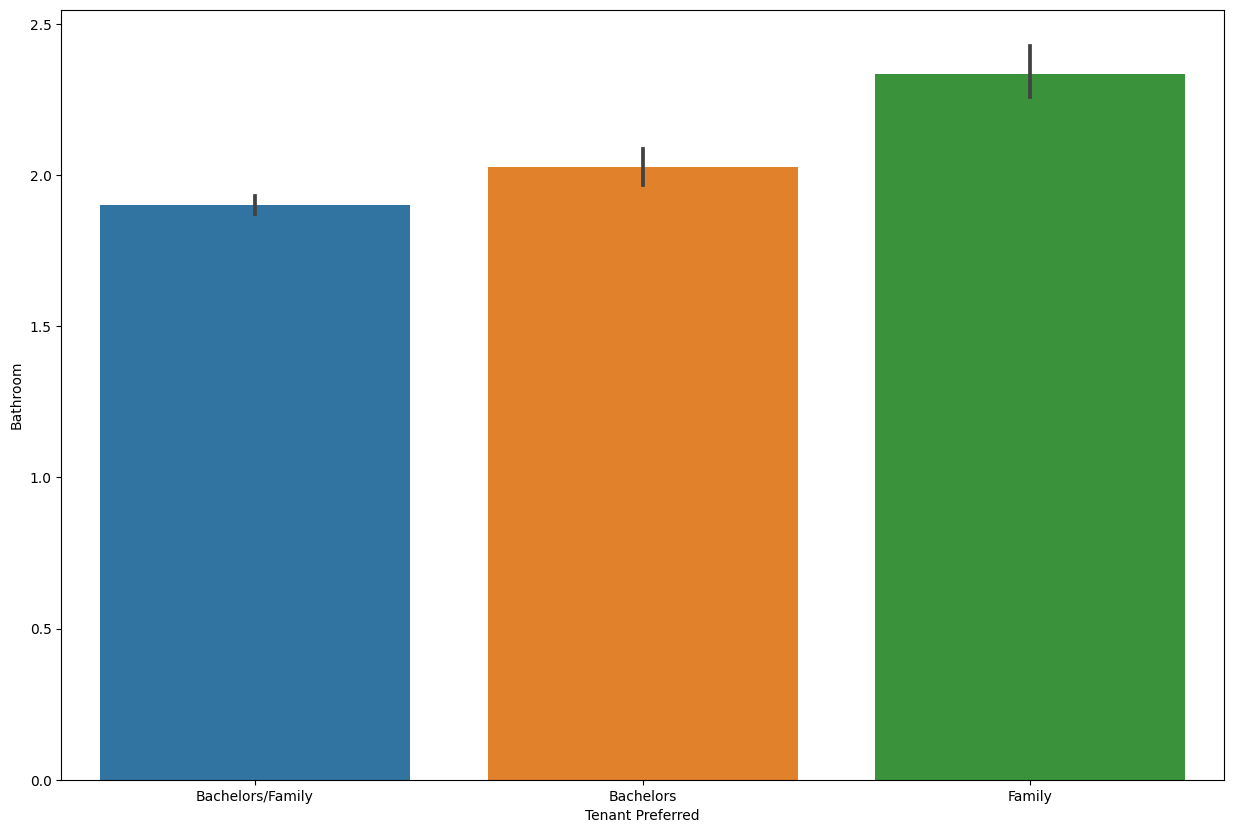

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_house, x = "Tenant Preferred", y = "Bathroom")

<Axes: xlabel='City', ylabel='Bathroom'>

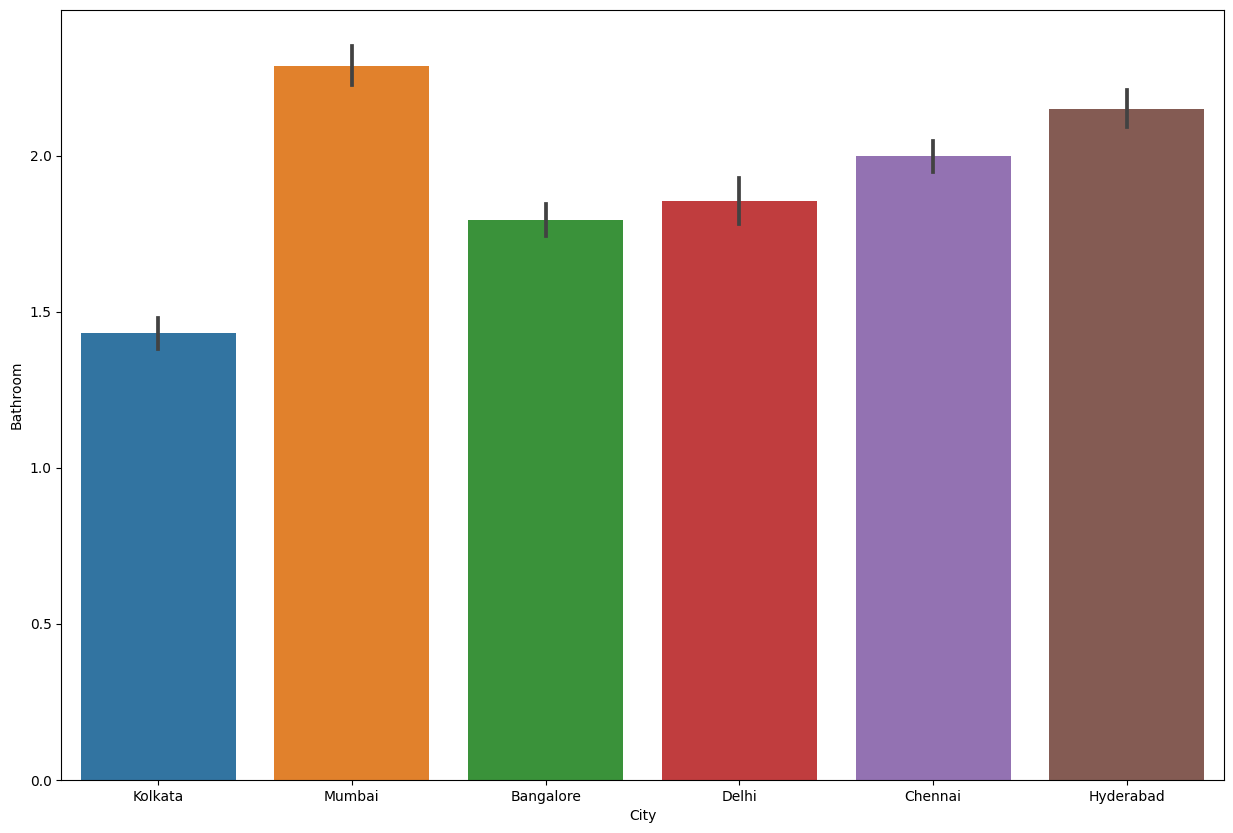

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_house, x = "City", y = "Bathroom")

In [ ]:
df_house[["Rent"]].describe()

,Rent
count,"4,746.00"
mean,"34,993.45"
std,"78,106.41"
min,"1,200.00"
25%,"10,000.00"
50%,"16,000.00"
75%,"33,000.00"
max,"3,500,000.00"


In [ ]:
def costo_renta(renta):
    if renta <= 10000:
        return "Barato"
    elif renta <= 16000:
        return "Buen precio"
    elif renta <= 33000:
        return "Costoso"
    else:
        return "Caro"

df_house["Tipo Renta"] = df_house["Rent"].apply(costo_renta)

<Axes: xlabel='Tenant Preferred', ylabel='Bathroom'>

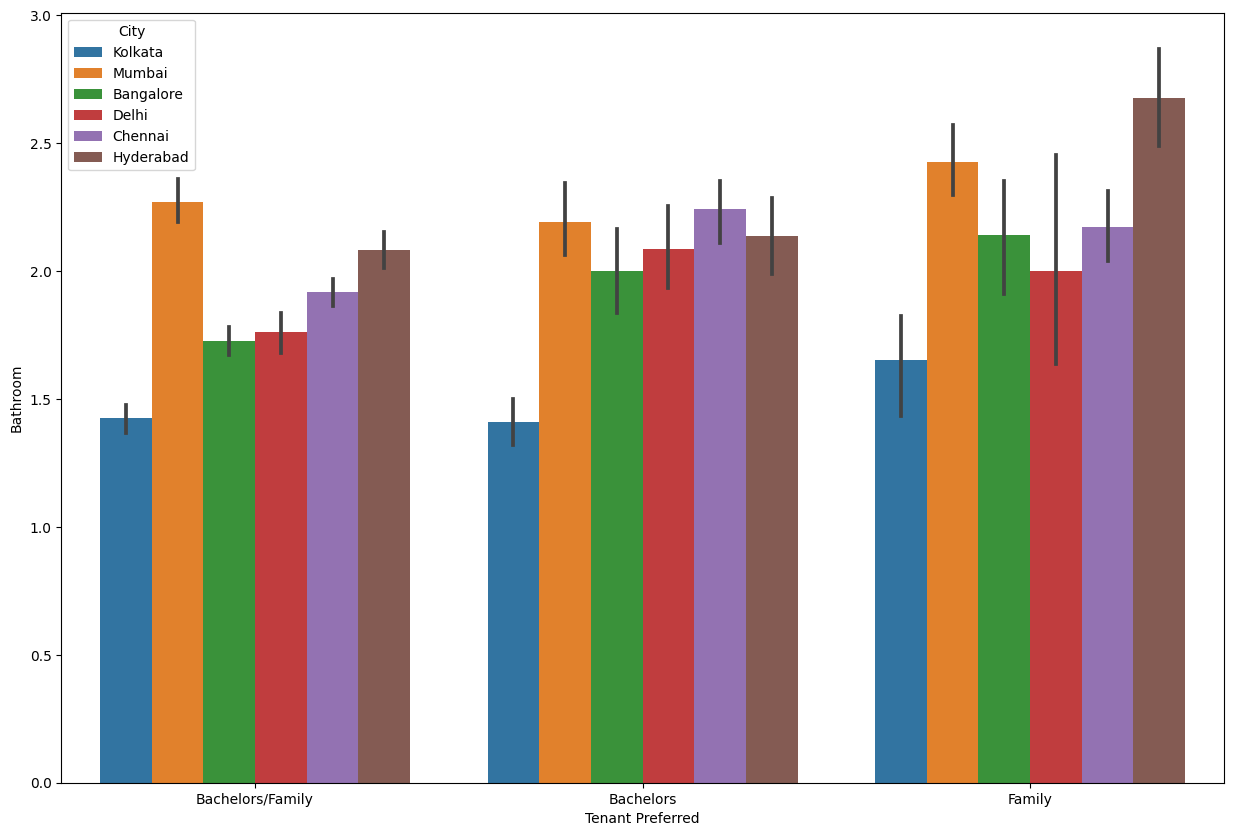

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_house, x = "Tenant Preferred", y = "Bathroom", hue= "City")

<Axes: xlabel='Tenant Preferred', ylabel='Bathroom'>

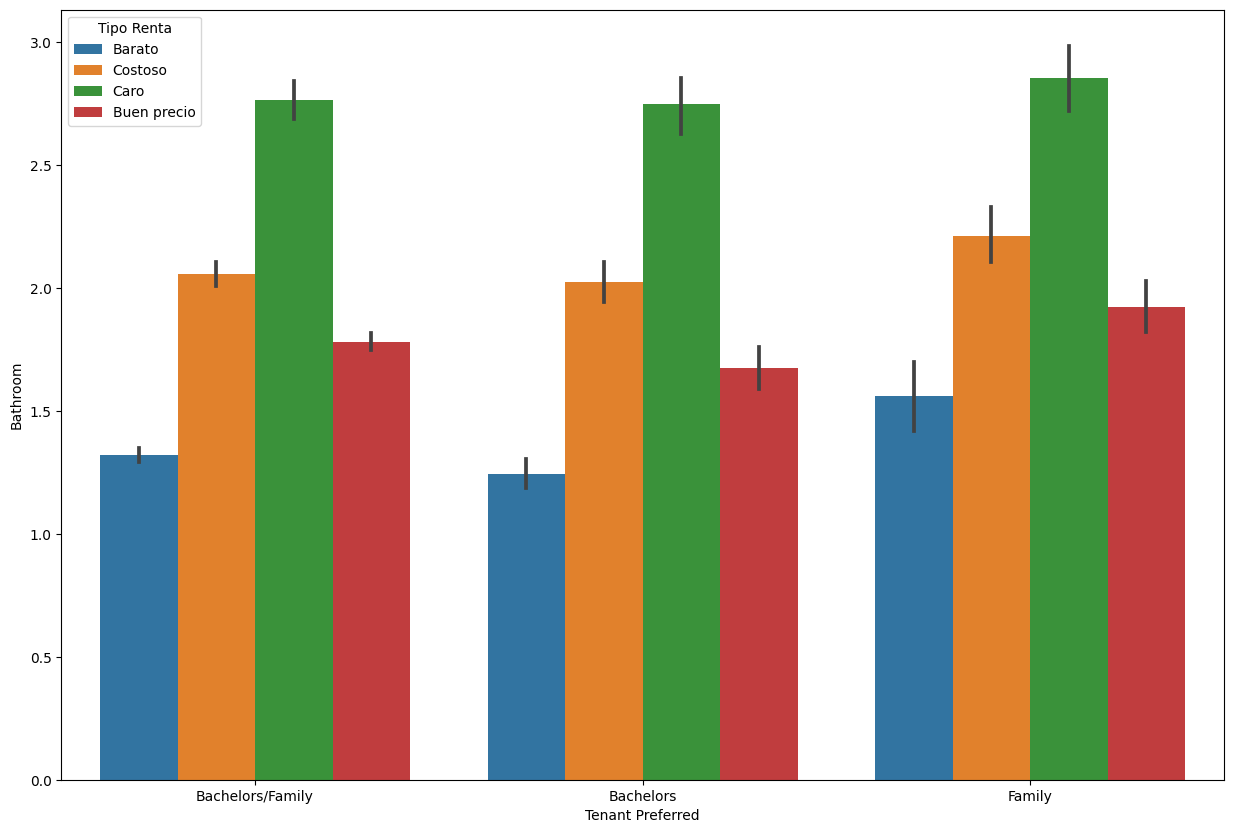

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_house, x = "Tenant Preferred", y = "Bathroom", hue= "Tipo Renta")

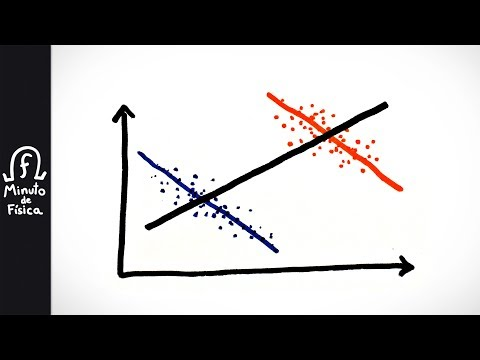

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('hpbXkrm68rI')
# https://www.youtube.com/watch?v=hpbXkrm68rI

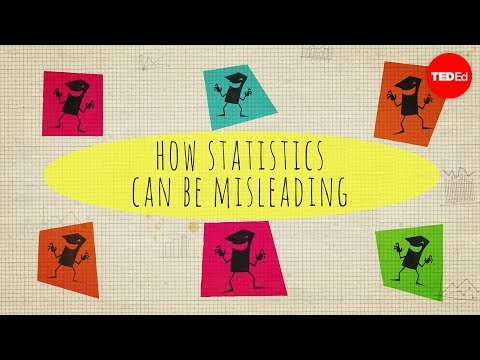

In [ ]:
YouTubeVideo('sxYrzzy3cq8')
# https://www.youtube.com/watch?v=sxYrzzy3cq8